<a href="https://colab.research.google.com/github/Spica08/deep-learning-from-scratch-5/blob/main/step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# set up
import os
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#データ準備
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# step2 最尤推定

## 2.1 生成モデルの概要

### 2.1.1 生成モデルとは
生成モデルの目標は、あるデータxの確率分布p(x)をモデル化すること。

### 2.1.2 母集団とサンプル
母集団は、対象となる全体の集合を表すが、通常サイズが膨大なため「推定」を行う。真の確率分布を推定するため通常以下の2つの作業を行う。  
1. モデル化 : 真の確率分布が「パラメータで調整可能な確率分布」で近似されると仮定する。  
2. パラメータ推定 : その確率分布がサンプルデータに合うようにパラメータを推定する。  

## 2.2 実データを使った生成モデルの実装

### 2.2.1 身長データセットの読み込み

(25000,)


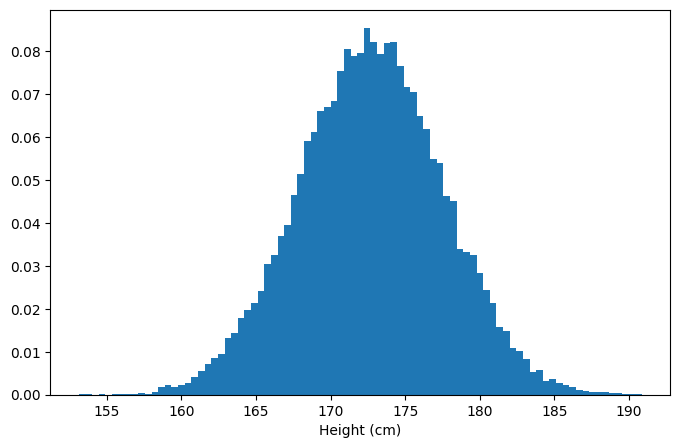

In [3]:
path = "/content/drive/MyDrive/datasets/SOCRdata/height.txt"
xs = np.loadtxt(path)
print(xs.shape)

fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(xs, bins = "auto", density = True)
ax.set_xlabel("Height (cm)")
fig.show()

身長の分布を正規分布としてモデル化できそう。

### 2.2.2 正規分布による生成モデル
正規分布による生成モデルの実装。1:モデル化、2:パラメータ推定、の作業を行う。  
パラメータを推定する方法の１つに**最尤推定**がある。結論として、正規分布のパラメータは「サンプル平均」「サンプル標準偏差」となる。

In [4]:
mu = np.mean(xs)
sigma = np.std(xs)
print(mu, sigma)

172.70250853667997 4.830167473396299


In [5]:
def normal(x, mu = 0, sigma = 1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma **2))
    return y

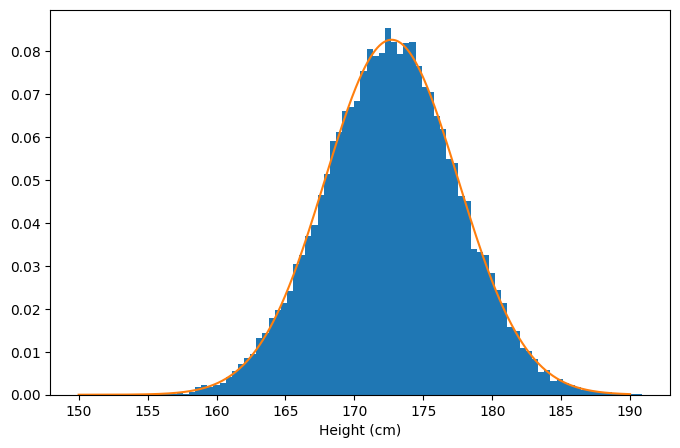

In [6]:
x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(xs, bins = "auto", density = True)
ax.plot(x, y)
ax.set_xlabel("Height (cm)")
fig.show()

## 2.3 最尤推定の理論
**最尤推定(Maximum Likelihood Estimation)**を用いた正規分布のパラメータ推定の導出を行う。

### 2.3.1 尤度の最大化
パラメータθによって決まる確率分布を考える。パラメータθの時、データxが得られる確率密度はp(x;θ)で表される。  
次に、サンプルD = {$x^{(1)}, x^{(2)}, \ldots, x^{(N)}$}が得られたとする。各データが独立に生成されたと仮定した時、サンプルDが得られる確率密度は次の式で表される。  
\begin{align}
p(D;θ) &= p(x^{(1)};θ) p(x^{(2)};θ) \dots p(x^{(N)};θ)\\
        &= \prod_{n = 1}^N p(x^{(n)};θ)
\end{align}
このp(D;θ)は、θを引数とする関数とみなして以下のように定義することもできる。  
\begin{equation}
L(θ) = p(D;θ)
\end{equation}
このL(θ)を**尤度**、**尤度関数**と呼び、あるパラメータθに対してサンプルDがどのくらい起こり得るかを確率密度として表す。  
最尤推定では、尤度p(D;θ)を最大化するθを見つける手法である。計算の都合上、実際には対数尤度logp(D;θ)の最大化を行う。

### 2.3.2 微分を使って最大値を探す
略

### 2.3.3 正規分布の最尤推定
正規分布の確率密度は以下の通り  
\begin{equation}
\mathcal{N}(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} exp \left(-\frac{(x - \mu)^2}{2\sigma^2} \right)
\end{equation}
N個の観測データが得られた時の尤度は、  
\begin{equation}
p(D;\mu,\sigma) = \prod_{n = 1}^N \frac{1}{\sqrt{2\pi}\sigma} exp \left(-\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)
\end{equation}
よって対数尤度は、  
\begin{align}
log p(D;\mu,\sigma) &= log \prod_{n = 1}^N \frac{1}{\sqrt{2\pi}\sigma} exp \left(-\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)\\
                    &= log \prod_{n = 1}^N \frac{1}{\sqrt{2\pi}\sigma} + log \prod_{n = 1}^N exp \left(-\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)\\
                    &= log \left (\frac{1}{\sqrt{2\pi}\sigma} \right)^N + \sum_{n = 1}^N \left(\frac{-(x^{(n)} - \mu)^2}{2\sigma^2} \right)\\
                    &= -N log(\sqrt{2\pi}\sigma) - \frac{1}{2\sigma^2} \sum_{n = 1}^N ((x^{(n)} - \mu)^2)\\
                    &= -\frac{N}{2} log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{n = 1}^N ((x^{(n)} - \mu)^2)
 \end{align}
 $\mu$に着目すると、対数尤度は$\mu$に関する二次関数となっておりその係数は負であるため、微分が0となる場所に最大値が存在する。$\mu$を含まない項は定数項として扱うことに注意して、  
 \begin{align}
 \frac{\partial L}{\partial \mu} &= \frac{\partial}{\partial \mu} \left(- \frac{1}{2\sigma^2} \sum_{n = 1}^N ((x^{(n)} - \mu)^2) \right) \\
    &= - \frac{1}{2\sigma^2} \sum_{n = 1}^N (2(x^{(n)} - \mu) (-1))\\
    &= \frac{1}{\sigma^2} \sum_{n = 1}^N ((x^{(n)} - \mu))
 \end{align}
 これが0なので、  
 \begin{align}
 \frac{1}{\sigma^2} \sum_{n = 1}^N ((x^{(n)} - \mu)) &= 0\\
 \iff \sum_{n = 1}^N ((x^{(n)} - \mu)) &= 0\\
 \iff \sum_{n = 1}^N \mu &= \sum_{n = 1}^N (x^{(n)}) \\
 \iff N\mu &= \sum_{n = 1}^N (x^{(n)})\\
 \iff \mu &= \frac{1}{N}\sum_{n = 1}^N x^{(n)}
 \end{align}
したがって、  
\begin{equation}
\hat{\mu} = \frac{1}{N}\sum_{n = 1}^N x^{(n)}
\end{equation}
で対数尤度が最大になる。  
次に標準偏差について、$\mu = \hat{\mu}$のもとで対数尤度が最大となる$\sigma$を解析的に求める。  
\begin{align}
 \frac{\partial L}{\partial \sigma} &= \frac{\partial}{\partial \sigma} \left(-\frac{N}{2} log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2 \right) \\
    &= -\frac{N}{2} \frac{1}{2\pi\sigma^2} 4\pi\sigma + \frac{2}{2\sigma^3} \sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2\\
    &= -\frac{N}{\sigma} + \frac{1}{\sigma^3}\sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2
 \end{align}
 これが0なので、
 \begin{align}
 -\frac{N}{\sigma} + \frac{1}{\sigma^3}\sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2 &= 0\\
 \frac{1}{\sigma^3}\sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2 &= \frac{N}{\sigma}\\
N\sigma^2 &= \sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2\\
\sigma &= \sqrt{\frac{1}{N} \sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2}
 \end{align}
 したがって、
 \begin{equation}
\hat{\sigma} = \sqrt{\frac{1}{N} \sum_{n = 1}^N (x^{(n)} - \hat{\mu})^2}
 \end{equation}

## 2.4 生成モデルの用途

### 2.4.1 新しいデータの生成
生成モデルを使えば、新しいデータを生成することができる。

In [6]:
print(mu, sigma)

172.70250853667997 4.830167473396299


In [7]:
sample = np.random.normal(mu, sigma)
print(sample) # create new data

174.1749669573597


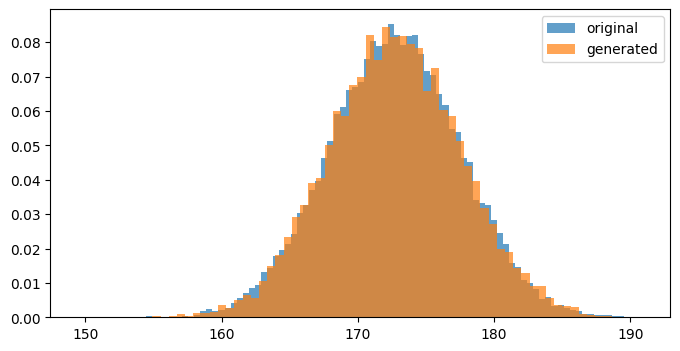

In [8]:
# 新たに10000個のサンプリングを行う
samples = np.random.normal(mu, sigma, 10000)

fig, ax = plt.subplots(figsize = (8, 4))
ax.hist(xs, bins = "auto", density = True, alpha = 0.7)
ax.hist(samples, bins = "auto", density = True, alpha = 0.7)
ax.legend(["original", "generated"])
fig.show()

観測データの特徴を捉えた新しいデータを生成したと言える。ここでは1次元の単純なデータだったが、モデルを工夫することで画像生成モデルへと拡張することができる。

### 2.4.2 確率の計算
連続型の確率分布で確立を求めるためには、確率密度p(x)の積分計算が必要になる。正規分布の場合は解析的に求められるが、それが難しい分布ではモンテカルロ法を使って近似的に求める。

In [10]:
# 正規分布の累積分布関数
x = 1.0
print(norm.cdf(x, loc = 0, scale = 1)) # mu = 0, sigma = 1の正規分布で、値がx以下となる確率

0.8413447460685429


これは、x <= 1の区間の面積を表している。